# **Assignment 3**

# 1. Download And unzip dataset

In [ ]:
# run this to download the dataset directly to the kernal

!gdown 1xkynpL15pt6KT3YSlDimu4A5iRU9qYck

Downloading...
From: https://drive.google.com/uc?id=1xkynpL15pt6KT3YSlDimu4A5iRU9qYck
To: /content/Flowers-Dataset.zip
100% 236M/236M [00:00<00:00, 286MB/s]


In [ ]:
# Unzip

!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# Importing Necessary Libs

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 2. Data Augmnetaion

In [ ]:
# For training

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   zoom_range=0.2)

In [ ]:
# for testing

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# To split the dataset into Train and test

!pip install split_folders

import splitfolders

input_folder = "/content/flowers"
output = "/content/Dataset"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.7,0.3))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4317 files [00:01, 3937.44 files/s]


In [ ]:
# data generation

xtrain = train_datagen.flow_from_directory('/content/Dataset/train',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)



xtest = test_datagen.flow_from_directory('/content/Dataset/val',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


# 3. Build Model

## Adding layers

In [ ]:
# Build a CNN block

model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

## Compiling Model

In [ ]:
# Compiling the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fit Model

In [ ]:
# Train model

model.fit(xtrain,
          steps_per_epoch=len(xtrain),
          epochs=50,
          validation_data=xtest,
          validation_steps=len(xtest))

Epoch 1/50
31/31 [==============================] - 23s 394ms/step - loss: 2.2765 - accuracy: 0.2842 - val_loss: 1.3119 - val_accuracy: 0.4584
Epoch 2/50
31/31 [==============================] - 12s 393ms/step - loss: 1.2581 - accuracy: 0.4627 - val_loss: 1.1517 - val_accuracy: 0.5062
Epoch 3/50
31/31 [==============================] - 16s 508ms/step - loss: 1.1536 - accuracy: 0.5353 - val_loss: 1.1332 - val_accuracy: 0.5193
Epoch 4/50
31/31 [==============================] - 12s 393ms/step - loss: 1.0853 - accuracy: 0.5720 - val_loss: 1.1248 - val_accuracy: 0.5378
Epoch 5/50
31/31 [==============================] - 13s 414ms/step - loss: 1.0715 - accuracy: 0.5826 - val_loss: 1.0632 - val_accuracy: 0.5770
Epoch 6/50
31/31 [==============================] - 12s 389ms/step - loss: 1.0135 - accuracy: 0.6055 - val_loss: 1.1189 - val_accuracy: 0.5639
Epoch 7/50
31/31 [==============================] - 13s 415ms/step - loss: 0.9690 - accuracy: 0.6327 - val_loss: 1.0554 - val_accuracy: 0.5940

#4. Save Model

In [ ]:
model.save('Flowers.h5')

# 5. Testing The Model

In [ ]:
def predict_flower(img_path):
  img = image.load_img(img_path,target_size=(64,64)) # Reading image
  x = image.img_to_array(img) # Converting image into array
  x = np.expand_dims(x,axis=0) # expanding Dimensions
  pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
  op = ['Daisy','Dandelion','Rose','SunFlower','Tulip'] # Creating list
  print(op[pred]) # List indexing with output
  plt.imshow(img) # Printing the image

## With Test Data Images

Daisy


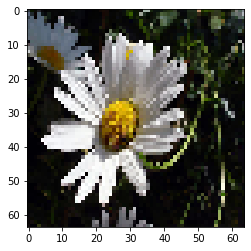

In [ ]:
# Testing 1
# Daisy flower Image

predict_flower('/content/Dataset/val/daisy/1150395827_6f94a5c6e4_n.jpg') # Predicting the image image


Dandelion


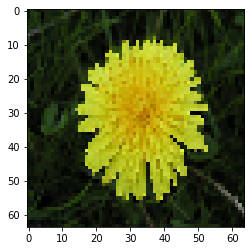

In [ ]:
# Testing 2
# Dandelion flower Image

predict_flower('/content/Dataset/val/dandelion/1128626197_3f52424215_n.jpg')

Rose


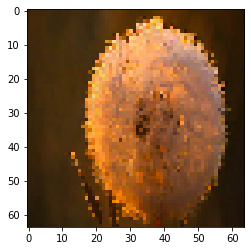

In [ ]:
# Testing 3
# Dandelion flower Image

predict_flower('/content/Dataset/val/dandelion/14199664556_188b37e51e.jpg')

Rose


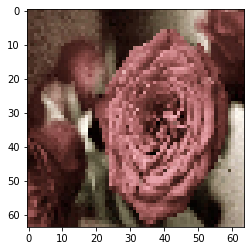

In [ ]:
# Testing 4
# Rose flower Image

predict_flower('/content/Dataset/val/rose/12202373204_34fb07205b.jpg')

Rose


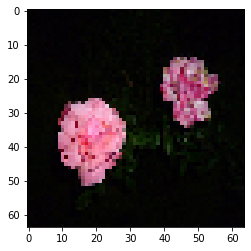

In [ ]:
# Testing 5
# Rose flower Image

predict_flower('/content/Dataset/val/rose/15820572326_be2ea4a55c_n.jpg')

SunFlower


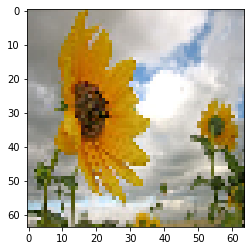

In [ ]:
# Testing 6
# Sunflower Image

predict_flower('/content/Dataset/val/sunflower/1596293240_2d5b53495a_m.jpg')

SunFlower


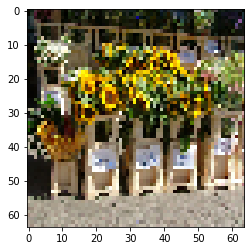

In [ ]:
# Testing 7
# Sunflower Image

predict_flower('/content/Dataset/val/sunflower/210076535_80951bc5d5.jpg')

Rose


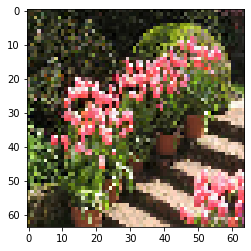

In [ ]:
# Testing 8
# Tulip Flower Image

predict_flower('/content/Dataset/val/tulip/13530690445_9f1f5cf43a_n.jpg')

Tulip


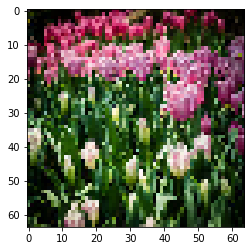

In [ ]:
# Testing 9
# Tulip Flower Image

predict_flower('/content/Dataset/val/tulip/16680927427_07ca6e4552_n.jpg')

Daisy


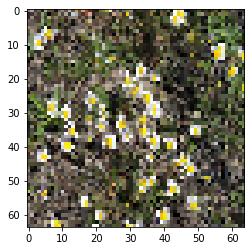

In [ ]:
# Testing 10
# Daisy Flower Image

predict_flower('/content/Dataset/val/daisy/34542837641_10492bf600_n.jpg')

## With Google Images

In [ ]:
# Run To download test images

!gdown 1Q-QTRIfXjV0BbLcIvopbiYfbAD3hJfmw

Downloading...
From: https://drive.google.com/uc?id=1Q-QTRIfXjV0BbLcIvopbiYfbAD3hJfmw
To: /content/IBM Flower_Test dataset.zip
100% 1.01M/1.01M [00:00<00:00, 163MB/s]


In [ ]:
# unzip

!unzip '/content/IBM Flower_Test dataset.zip'

Archive:  /content/IBM Flower_Test dataset.zip
replace IBM Flower_Test dataset/tulip_2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Tulip


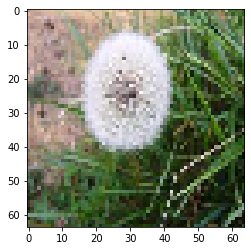

In [ ]:
# Test 1
# Dandelion Flower

predict_flower('/content/IBM Flower_Test dataset/Dandelion.jpeg')

Daisy


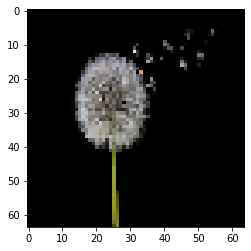

In [ ]:
# Test 2
# Dandelion Flower

predict_flower('/content/IBM Flower_Test dataset/Dandelion_2.jpeg')

Tulip


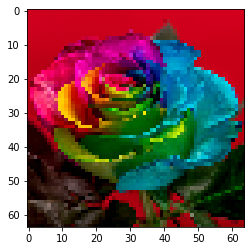

In [ ]:
# Test 3
# Rose Flower

predict_flower('/content/IBM Flower_Test dataset/Rose.jpeg')

Rose


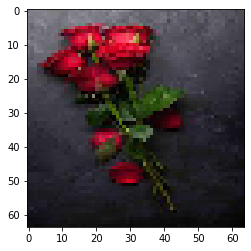

In [ ]:
# Test 4
# Rose Flower

predict_flower('/content/IBM Flower_Test dataset/Rose_2.jpeg')

Daisy


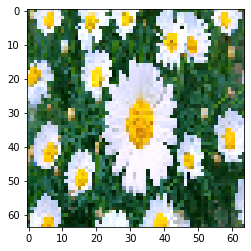

In [ ]:
# Test 5
# Daisy Flower

predict_flower('/content/IBM Flower_Test dataset/daisy-flower-1532449822.jpg')

Rose


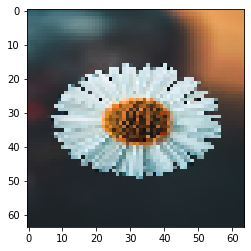

In [ ]:
# Test 6
# Daisy Flower

predict_flower('/content/IBM Flower_Test dataset/photo-1606041008023-472dfb5e530f.jpeg')

SunFlower


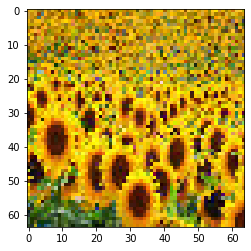

In [ ]:
# Test 7
# Sun Flower

predict_flower('/content/IBM Flower_Test dataset/sunflower.jpeg')

SunFlower


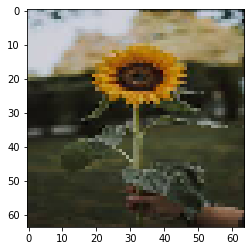

In [ ]:
# Test 8
# Sun Flower

predict_flower('/content/IBM Flower_Test dataset/sunflower_2.jpeg')

Tulip


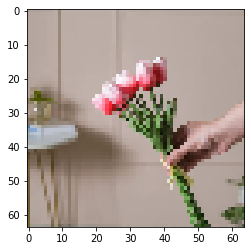

In [ ]:
# Test 9
# Tulip Flower

predict_flower('/content/IBM Flower_Test dataset/tulip.webp')

Tulip


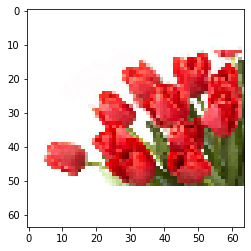

In [ ]:
# Test 10
# Tulip Flower

predict_flower('/content/IBM Flower_Test dataset/tulip_2.jpg')